# Deep Convolutional Neural Networks (AlexNet)
:label:`sec_alexnet`


Although CNNs were well known
in the computer vision and machine learning communities
following the introduction of LeNet :cite:`LeCun.Jackel.Bottou.ea.1995`,
they did not immediately dominate the field.
Although LeNet achieved good results on early small datasets,
the performance and feasibility of training CNNs
on larger, more realistic datasets had yet to be established.
In fact, for much of the intervening time between the early 1990s
and the watershed results of 2012 :cite:`Krizhevsky.Sutskever.Hinton.2012`,
neural networks were often surpassed by other machine learning methods,
such as kernel methods :cite:`Scholkopf.Smola.2002`, ensemble methods :cite:`Freund.Schapire.ea.1996`,
and structured estimation :cite:`Taskar.Guestrin.Koller.2004`.

For computer vision, this comparison is perhaps not entirely accurate.
That is, although the inputs to convolutional networks
consist of raw or lightly-processed (e.g., by centering) pixel values, practitioners would never feed raw pixels into traditional models.
Instead, typical computer vision pipelines
consisted of manually engineering feature extraction pipelines, such as SIFT :cite:`Lowe.2004`, SURF :cite:`Bay.Tuytelaars.Van-Gool.2006`, and bags of visual words :cite:`Sivic.Zisserman.2003`.
Rather than *learning* the features, the features were *crafted*.
Most of the progress came from having more clever ideas for feature extraction on the one hand and deep insight into geometry :cite:`Hartley.Zisserman.2000` on the other. The learning algorithm was often considered an afterthought.

Although some neural network accelerators were available in the 1990s,
they were not yet sufficiently powerful to make
deep multichannel, multilayer CNNs
with a large number of parameters. For instance, NVIDIA's GeForce 256 from 1999
was able to process at most 480 million floating-point operations, such as additions and multiplications, per second (MFLOPS), without any meaningful
programming framework for operations beyond games. Today's accelerators are able to perform in excess of 1000 TFLOPs per device.
Moreover, datasets were still relatively small: OCR on 60,000 low-resolution $28 \times 28$ pixel images was considered a highly challenging task.
Added to these obstacles, key tricks for training neural networks
including parameter initialization heuristics :cite:`Glorot.Bengio.2010`,
clever variants of stochastic gradient descent :cite:`Kingma.Ba.2014`,
non-squashing activation functions :cite:`Nair.Hinton.2010`,
and effective regularization techniques :cite:`Srivastava.Hinton.Krizhevsky.ea.2014` were still missing.

Thus, rather than training *end-to-end* (pixel to classification) systems,
classical pipelines looked more like this:

1. Obtain an interesting dataset. In the early days, these datasets required expensive sensors. For instance, the [Apple QuickTake 100](https://en.wikipedia.org/wiki/Apple_QuickTake) of 1994 sported a whopping 0.3 megapixel (VGA) resolution, capable of storing up to 8 images, all for the price of \$1000.
1. Preprocess the dataset with hand-crafted features based on some knowledge of optics, geometry, other analytic tools, and occasionally on the serendipitous discoveries by lucky graduate students.
1. Feed the data through a standard set of feature extractors such as the SIFT (scale-invariant feature transform) :cite:`Lowe.2004`, the SURF (speeded up robust features) :cite:`Bay.Tuytelaars.Van-Gool.2006`, or any number of other hand-tuned pipelines. OpenCV still provides SIFT extractors to this day!
1. Dump the resulting representations into your favorite classifier, likely a linear model or kernel method, to train a classifier.

If you spoke to machine learning researchers,
they would reply that machine learning was both important and beautiful.
Elegant theories proved the properties of various classifiers :cite:`boucheron2005theory` and convex
optimization :cite:`Boyd.Vandenberghe.2004` had become the mainstay for obtaining them.
The field of machine learning was thriving, rigorous, and eminently useful. However,
if you spoke to a computer vision researcher,
you would hear a very different story.
The dirty truth of image recognition, they would tell you,
is that features, geometry :cite:`Hartley.Zisserman.2000,hartley2009global`, and engineering,
rather than novel learning algorithms, drove progress.
Computer vision researchers justifiably believed
that a slightly bigger or cleaner dataset
or a slightly improved feature-extraction pipeline
mattered far more to the final accuracy than any learning algorithm.


# 深度卷积神经网络(AlexNet)
:label:`sec_alexnet`

尽管在LeNet :cite:`LeCun.Jackel.Bottou.ea.1995`提出后，卷积神经网络在计算机视觉和机器学习社区中已广为人知，但并未立即主导该领域。虽然LeNet在早期小型数据集上取得了不错的结果，但在更大、更真实的数据集上训练CNN的性能和可行性仍有待验证。事实上，从1990年代初到2012年突破性成果:cite:`Krizhevsky.Sutskever.Hinton.2012`出现之间的这段时间，神经网络经常被其他机器学习方法超越，如核方法:cite:`Scholkopf.Smola.2002`、集成方法:cite:`Freund.Schapire.ea.1996`和结构化估计:cite:`Taskar.Guestrin.Koller.2004`。

对计算机视觉而言，这种比较或许并不完全准确。虽然卷积网络的输入由原始或轻度处理(如居中)的像素值组成，但从业者从不会将原始像素输入传统模型。相反，典型的计算机视觉流程包括手工设计的特征提取流程，如SIFT:cite:`Lowe.2004`、SURF:cite:`Bay.Tuytelaars.Van-Gool.2006`和视觉词袋:cite:`Sivic.Zisserman.2003`。这些特征是"手工制作"而非"学习得到"的。大多数进展一方面来自更聪明的特征提取思路，另一方面来自对几何学的深刻理解:cite:`Hartley.Zisserman.2000`。学习算法通常被视为次要考虑。

尽管1990年代已有一些神经网络加速器，但它们还不足以支持具有大量参数的深度多通道多层CNN。例如，1999年NVIDIA的GeForce 256每秒最多只能处理4.8亿次浮点运算(MFLOPS)，且没有游戏以外的编程框架。而今天的加速器每设备可执行超过1000 TFLOPs。此外，当时的数据集仍然相对较小：在60,000张低分辨率$28 \times 28$像素图像上进行OCR被认为极具挑战性。除此之外，训练神经网络的关键技巧也尚未出现，包括参数初始化启发式方法:cite:`Glorot.Bengio.2010`、随机梯度下降的巧妙变体:cite:`Kingma.Ba.2014`、非饱和激活函数:cite:`Nair.Hinton.2010`和有效的正则化技术:cite:`Srivastava.Hinton.Krizhevsky.ea.2014`。

因此，当时的流程不是训练端到端(像素到分类)系统，而是更像这样：

1. 获取有趣的数据集。早期这些数据集需要昂贵的传感器。例如1994年的[Apple QuickTake 100](https://en.wikipedia.org/wiki/Apple_QuickTake)相机仅有30万像素(VGA)分辨率，最多存储8张图像，售价却高达1000美元。
2. 基于光学、几何学知识和其他分析工具，偶尔还有幸运研究生的偶然发现，手工设计特征预处理数据集。
3. 将数据输入标准特征提取器，如SIFT(尺度不变特征变换):cite:`Lowe.2004`、SURF(加速稳健特征):cite:`Bay.Tuytelaars.Van-Gool.2006`或其他手工调整的流程。OpenCV至今仍提供SIFT提取器！
4. 将得到的表示输入你喜欢的分类器(可能是线性模型或核方法)训练分类器。

如果你与机器学习研究者交谈，他们会说机器学习既重要又优美。优雅的理论证明了各种分类器的性质:cite:`boucheron2005theory`，凸优化:cite:`Boyd.Vandenberghe.2004`已成为实现它们的主要方法。机器学习领域蓬勃发展、严谨且极其有用。但如果你与计算机视觉研究者交谈，会听到完全不同的故事。他们会告诉你图像识别的真相是：特征、几何学:cite:`Hartley.Zisserman.2000,hartley2009global`和工程实践，而非新颖的学习算法，推动了进步。计算机视觉研究者有理由相信，稍大或更干净的数据集，或稍加改进的特征提取流程，对最终准确性的影响远大于任何学习算法。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## Representation Learning

Another way to cast the state of affairs is that
the most important part of the pipeline was the representation.
And up until 2012 the representation was calculated mostly mechanically.
In fact, engineering a new set of feature functions, improving results, and writing up the method
all featured prominently in papers.
SIFT :cite:`Lowe.2004`,
SURF :cite:`Bay.Tuytelaars.Van-Gool.2006`,
HOG (histograms of oriented gradient) :cite:`Dalal.Triggs.2005`,
bags of visual words :cite:`Sivic.Zisserman.2003`,
and similar feature extractors ruled the roost.

Another group of researchers,
including Yann LeCun, Geoff Hinton, Yoshua Bengio,
Andrew Ng, Shun-ichi Amari, and Juergen Schmidhuber,
had different plans.
They believed that features themselves ought to be learned.
Moreover, they believed that to be reasonably complex,
the features ought to be hierarchically composed
with multiple jointly learned layers, each with learnable parameters.
In the case of an image, the lowest layers might come
to detect edges, colors, and textures, by analogy with how the visual system in animals
processes its input. In particular, the automatic design of visual features such as those obtained
by sparse coding :cite:`olshausen1996emergence` remained an open challenge until the advent of modern CNNs.
It was not until :citet:`Dean.Corrado.Monga.ea.2012,le2013building` that the idea of generating features
from image data automatically gained significant traction.

The first modern CNN :cite:`Krizhevsky.Sutskever.Hinton.2012`, named
*AlexNet* after one of its inventors, Alex Krizhevsky, is largely an evolutionary improvement
over LeNet. It achieved excellent performance in the 2012 ImageNet challenge.

![Image filters learned by the first layer of AlexNet. Reproduction courtesy of :citet:`Krizhevsky.Sutskever.Hinton.2012`.](../img/filters.png)
:width:`400px`
:label:`fig_filters`

Interestingly, in the lowest layers of the network,
the model learned feature extractors that resembled some traditional filters.
:numref:`fig_filters`
shows lower-level image descriptors.
Higher layers in the network might build upon these representations
to represent larger structures, like eyes, noses, blades of grass, and so on.
Even higher layers might represent whole objects
like people, airplanes, dogs, or frisbees.
Ultimately, the final hidden state learns a compact representation
of the image that summarizes its contents
such that data belonging to different categories can be easily separated.

AlexNet (2012) and its precursor LeNet (1995) share many architectural elements. This begs the question: why did it take so long?
A key difference was that, over the previous two decades, the amount of data and the computing power available had increased significantly. As such AlexNet was much larger: it was trained on much more data, and on much faster GPUs compared to the CPUs available in 1995.

### Missing Ingredient: Data

Deep models with many layers require large amounts of data
in order to enter the regime
where they significantly outperform traditional methods
based on convex optimizations (e.g., linear and kernel methods).
However, given the limited storage capacity of computers,
the relative expense of (imaging) sensors,
and the comparatively tighter research budgets in the 1990s,
most research relied on tiny datasets.
Numerous papers relied on the UCI collection of datasets,
many of which contained only hundreds or (a few) thousands of images
captured in low resolution and often with an artificially clean background.

In 2009, the ImageNet dataset was released :cite:`Deng.Dong.Socher.ea.2009`,
challenging researchers to learn models from 1 million examples,
1000 each from 1000 distinct categories of objects. The categories themselves
were based on the most popular noun nodes in WordNet :cite:`Miller.1995`.
The ImageNet team used Google Image Search to prefilter large candidate sets
for each category and employed
the Amazon Mechanical Turk crowdsourcing pipeline
to confirm for each image whether it belonged to the associated category.
This scale was unprecedented, exceeding others by over an order of magnitude
(e.g., CIFAR-100 has 60,000 images). Another aspect was that the images were at
relatively high resolution of $224 \times 224$ pixels, unlike the 80 million-sized
TinyImages dataset :cite:`Torralba.Fergus.Freeman.2008`, consisting of $32 \times 32$ pixel thumbnails.
This allowed for the formation of higher-level features.
The associated competition, dubbed the ImageNet Large Scale Visual Recognition
Challenge :cite:`russakovsky2015imagenet`,
pushed computer vision and machine learning research forward,
challenging researchers to identify which models performed best
at a greater scale than academics had previously considered. The largest vision datasets, such as LAION-5B
:cite:`schuhmann2022laion` contain billions of images with additional metadata.

### Missing Ingredient: Hardware

Deep learning models are voracious consumers of compute cycles.
Training can take hundreds of epochs, and each iteration
requires passing data through many layers of computationally expensive
linear algebra operations.
This is one of the main reasons why in the 1990s and early 2000s,
simple algorithms based on the more-efficiently optimized
convex objectives were preferred.

*Graphical processing units* (GPUs) proved to be a game changer
in making deep learning feasible.
These chips had earlier been developed for accelerating
graphics processing to benefit computer games.
In particular, they were optimized for high throughput $4 \times 4$
matrix--vector products, which are needed for many computer graphics tasks.
Fortunately, the math is strikingly similar
to that required for calculating convolutional layers.
Around that time, NVIDIA and ATI had begun optimizing GPUs
for general computing operations :cite:`Fernando.2004`,
going as far as to market them as *general-purpose GPUs* (GPGPUs).

To provide some intuition, consider the cores of a modern microprocessor
(CPU).
Each of the cores is fairly powerful running at a high clock frequency
and sporting large caches (up to several megabytes of L3).
Each core is well-suited to executing a wide range of instructions,
with branch predictors, a deep pipeline, specialized execution units,
speculative execution,
and many other bells and whistles
that enable it to run a large variety of programs with sophisticated control flow.
This apparent strength, however, is also its Achilles heel:
general-purpose cores are very expensive to build. They excel at general-purpose
code with lots of control flow.
This requires lots of chip area, not just for the
actual ALU (arithmetic logical unit) where computation happens, but also for
all the aforementioned bells and whistles, plus
memory interfaces, caching logic between cores,
high-speed interconnects, and so on. CPUs are
comparatively bad at any single task when compared with dedicated hardware.
Modern laptops have 4--8 cores,
and even high-end servers rarely exceed 64 cores per socket,
simply because it is not cost-effective.

By comparison, GPUs can consist of thousands of small processing elements (NIVIDA's latest Ampere chips have up to 6912 CUDA cores), often grouped into larger groups (NVIDIA calls them warps).
The details differ somewhat between NVIDIA, AMD, ARM and other chip vendors. While each core is relatively weak,
running at about 1GHz clock frequency,
it is the total number of such cores that makes GPUs orders of magnitude faster than CPUs.
For instance, NVIDIA's recent Ampere A100 GPU offers over 300 TFLOPs per chip for specialized 16-bit precision (BFLOAT16) matrix-matrix multiplications, and up to 20 TFLOPs for more general-purpose floating point operations (FP32).
At the same time, floating point performance of CPUs rarely exceeds 1 TFLOPs. For instance, Amazon's Graviton 3  reaches 2 TFLOPs peak performance for 16-bit precision operations, a number similar to the GPU performance of Apple's M1 processor.

There are many reasons why GPUs are much faster than CPUs in terms of FLOPs.
First, power consumption tends to grow *quadratically* with clock frequency.
Hence, for the power budget of a CPU core that runs four times faster (a typical number),
you can use 16 GPU cores at $\frac{1}{4}$ the speed,
which yields $16 \times \frac{1}{4} = 4$ times the performance.
Second, GPU cores are much simpler
(in fact, for a long time they were not even *able*
to execute general-purpose code),
which makes them more energy efficient. For instance, (i) they tend not to support speculative evaluation, (ii) it typically is not possible to program each processing element individually, and (iii) the caches per core tend to be much smaller.
Last, many operations in deep learning require high memory bandwidth.
Again, GPUs shine here with buses that are at least 10 times as wide as many CPUs.

Back to 2012. A major breakthrough came
when Alex Krizhevsky and Ilya Sutskever
implemented a deep CNN
that could run on GPUs.
They realized that the computational bottlenecks in CNNs,
convolutions and matrix multiplications,
are all operations that could be parallelized in hardware.
Using two NVIDIA GTX 580s with 3GB of memory, either of which was capable of 1.5 TFLOPs (still a challenge for most CPUs a decade later),
they implemented fast convolutions.
The [cuda-convnet](https://code.google.com/archive/p/cuda-convnet/) code
was good enough that for several years
it was the industry standard and powered
the first couple of years of the deep learning boom.

## AlexNet

AlexNet, which employed an 8-layer CNN,
won the ImageNet Large Scale Visual Recognition Challenge 2012
by a large margin :cite:`Russakovsky.Deng.Huang.ea.2013`.
This network showed, for the first time,
that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.

The architectures of AlexNet and LeNet are strikingly similar,
as :numref:`fig_alexnet` illustrates.
Note that we provide a slightly streamlined version of AlexNet
removing some of the design quirks that were needed in 2012
to make the model fit on two small GPUs.

![From LeNet (left) to AlexNet (right).](../img/alexnet.svg)
:label:`fig_alexnet`

There are also significant differences between AlexNet and LeNet.
First, AlexNet is much deeper than the comparatively small LeNet-5.
AlexNet consists of eight layers: five convolutional layers,
two fully connected hidden layers, and one fully connected output layer.
Second, AlexNet used the ReLU instead of the sigmoid
as its activation function. Let's delve into the details below.

### Architecture

In AlexNet's first layer, the convolution window shape is $11\times11$.
Since the images in ImageNet are eight times taller and wider
than the MNIST images,
objects in ImageNet data tend to occupy more pixels with more visual detail.
Consequently, a larger convolution window is needed to capture the object.
The convolution window shape in the second layer
is reduced to $5\times5$, followed by $3\times3$.
In addition, after the first, second, and fifth convolutional layers,
the network adds max-pooling layers
with a window shape of $3\times3$ and a stride of 2.
Moreover, AlexNet has ten times more convolution channels than LeNet.

After the final convolutional layer, there are two huge fully connected layers
with 4096 outputs.
These layers require nearly 1GB model parameters.
Because of the limited memory in early GPUs,
the original AlexNet used a dual data stream design,
so that each of their two GPUs could be responsible
for storing and computing only its half of the model.
Fortunately, GPU memory is comparatively abundant now,
so we rarely need to break up models across GPUs these days
(our version of the AlexNet model deviates
from the original paper in this aspect).

### Activation Functions

Furthermore, AlexNet changed the sigmoid activation function to a simpler ReLU activation function. On the one hand, the computation of the ReLU activation function is simpler. For example, it does not have the exponentiation operation found in the sigmoid activation function.
 On the other hand, the ReLU activation function makes model training easier when using different parameter initialization methods. This is because, when the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is almost 0, so that backpropagation cannot continue to update some of the model parameters. By contrast, the gradient of the ReLU activation function in the positive interval is always 1 (:numref:`subsec_activation-functions`). Therefore, if the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive interval, meaning that the model cannot be effectively trained.

### Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully connected layer
by dropout (:numref:`sec_dropout`),
while LeNet only uses weight decay.
To augment the data even further, the training loop of AlexNet
added a great deal of image augmentation,
such as flipping, clipping, and color changes.
This makes the model more robust and the larger sample size effectively reduces overfitting.
See :citet:`Buslaev.Iglovikov.Khvedchenya.ea.2020` for an in-depth review of such preprocessing steps.

## 表示学习

另一种描述现状的方式是：整个流程中最重要的部分是特征表示。在2012年之前，特征表示主要通过人工设计的方式计算。事实上，设计新的特征函数、改进结果并撰写相关论文是当时研究的重点。SIFT :cite:`Lowe.2004`、SURF :cite:`Bay.Tuytelaars.Van-Gool.2006`、HOG（方向梯度直方图）:cite:`Dalal.Triggs.2005`、视觉词袋 :cite:`Sivic.Zisserman.2003`等特征提取方法占据主导地位。

另一组研究人员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun-ichi Amari和Juergen Schmidhuber，则有不同的计划。他们认为特征本身应该通过学习获得。更重要的是，他们认为要获得足够复杂的特征，应该通过多个可联合学习的层次进行层级组合，每个层次都有可学习的参数。对于图像而言，底层可能学会检测边缘、颜色和纹理，类似于动物视觉系统处理输入的方式。特别是，像稀疏编码 :cite:`olshausen1996emergence`那样自动设计视觉特征的方法，直到现代CNN出现前一直是个开放性问题。直到 :citet:`Dean.Corrado.Monga.ea.2012,le2013building`的研究，自动从图像数据生成特征的想法才获得广泛关注。

第一个现代CNN :cite:`Krizhevsky.Sutskever.Hinton.2012`以发明者之一Alex Krizhevsky的名字命名为*AlexNet*，它主要是对LeNet的渐进式改进。AlexNet在2012年ImageNet挑战赛中取得了卓越成绩。

![AlexNet第一层学习到的图像滤波器。复制自 :citet:`Krizhevsky.Sutskever.Hinton.2012`](../img/filters.png)
:width:`400px`
:label:`fig_filters`

有趣的是，在网络的最低层，模型学习到的特征提取器类似于一些传统滤波器。:numref:`fig_filters`展示了这些低层图像描述符。网络的更高层可以在这些表示基础上构建更大的结构，如眼睛、鼻子、草叶等。再高层的表示可能对应完整物体，如人、飞机、狗或飞盘。最终，最后的隐藏状态学习到图像的紧凑表示，总结其内容，使得属于不同类别的数据能够轻松分离。

AlexNet(2012)与其前身LeNet(1995)有许多相同的架构元素。这就引出一个问题：为什么花了这么长时间？关键区别在于，过去二十年中可用数据量和计算能力显著增加。因此AlexNet规模更大：它使用更多数据进行训练，并且使用比1995年CPU快得多的GPU进行训练。

### 缺失要素：数据

具有多层的深度模型需要大量数据才能进入显著优于基于凸优化(如线性和核方法)的传统方法的领域。然而，由于计算机存储容量有限、成像传感器相对昂贵以及1990年代研究预算相对紧张，大多数研究依赖小型数据集。许多论文使用UCI数据集集合，其中许多仅包含数百或数千张低分辨率图像，且背景通常经过人工清理。

2009年发布的ImageNet数据集 :cite:`Deng.Dong.Socher.ea.2009`挑战研究人员从100万样本中学习模型，涵盖1000个不同物体类别，每个类别1000个样本。这些类别基于WordNet :cite:`Miller.1995`中最流行的名词节点。ImageNet团队使用Google图片搜索预筛选每个类别的大量候选图像，并利用Amazon Mechanical Turk众包流程确认每张图像是否属于相关类别。这个规模前所未有，比其他数据集大一个数量级(如CIFAR-100有6万张图像)。另一个特点是图像分辨率相对较高(224×224像素)，不同于包含3200万张32×32像素缩略图的TinyImages数据集 :cite:`Torralba.Fergus.Freeman.2008`。这使得可以形成更高层次的特征。相关竞赛称为ImageNet大规模视觉识别挑战赛 :cite:`russakovsky2015imagenet`，推动了计算机视觉和机器学习研究，挑战研究人员在比学术界先前考虑的更大规模上确定哪些模型表现最佳。最大的视觉数据集如LAION-5B :cite:`schuhmann2022laion`包含数十亿张带有额外元数据的图像。

### 缺失要素：硬件

深度学习模型是计算周期的贪婪消费者。训练可能需要数百个epoch，每次迭代都需要通过许多计算密集的线性代数层传递数据。这是1990年代和2000年代初更倾向于使用基于更高效优化的凸目标的简单算法的主要原因之一。

图形处理单元(GPU)被证明是实现深度学习的改变者。这些芯片最初是为加速图形处理以提升电脑游戏体验而开发的。特别是，它们针对许多计算机图形任务所需的4×4矩阵-向量乘积进行了优化。幸运的是，这种数学运算与计算卷积层所需的运算惊人地相似。大约在同一时期，NVIDIA和ATI开始优化GPU以支持通用计算操作 :cite:`Fernando.2004`，甚至将其作为通用GPU(GPGPU)进行营销。

为了提供一些直观理解，考虑现代微处理器(CPU)的核心。每个核心都相当强大，运行在高时钟频率下，并具有大缓存(高达几MB的L3)。每个核心都适合执行各种指令，具有分支预测器、深度流水线、专用执行单元、推测执行和许多其他功能，使其能够运行具有复杂控制流的各种程序。然而，这种明显的优势也是其致命弱点：通用核心构建成本非常高。它们擅长具有大量控制流的通用代码。这不仅需要实际执行计算的ALU(算术逻辑单元)占用大量芯片面积，还需要前述所有功能部件，加上内存接口、核心间缓存逻辑、高速互连等。与专用硬件相比，CPU在任何单一任务上都相对较差。现代笔记本电脑有4-8个核心，甚至高端服务器每个插槽也很少超过64个核心，因为这不符合成本效益。

相比之下，GPU可以由数千个小处理元素组成(NVIDIA最新的Ampere芯片有高达6912个CUDA核心)，通常分组为更大的组(NVIDIA称为warp)。细节在NVIDIA、AMD、ARM和其他芯片厂商之间有所不同。虽然每个核心相对较弱，运行频率约为1GHz，但核心总数使GPU比CPU快几个数量级。例如，NVIDIA最新的Ampere A100 GPU在专门的16位精度(BFLOAT16)矩阵-矩阵乘法中提供超过300 TFLOPS的性能，在更通用的浮点运算(FP32)中提供高达20 TFLOPS。同时，CPU的浮点性能很少超过1 TFLOPS。例如，Amazon的Graviton 3在16位精度运算中达到2 TFLOPS峰值性能，与Apple M1处理器的GPU性能相当。

GPU在FLOPs方面比CPU快得多有几个原因。首先，功耗往往随时钟频率呈二次方增长。因此，对于一个运行速度快四倍(典型数值)的CPU核心的功耗预算，可以使用16个速度为其1/4的GPU核心，产生16×1/4=4倍的性能。其次，GPU核心要简单得多(事实上，长期以来它们甚至不能执行通用代码)，这使得它们更节能。例如，(i)它们通常不支持推测执行，(ii)通常无法单独编程每个处理元素，(iii)每个核心的缓存往往小得多。最后，深度学习中的许多操作需要高内存带宽。在这方面GPU再次表现出色，其总线宽度至少是许多CPU的10倍。

回到2012年。当Alex Krizhevsky和Ilya Sutskever实现了可以在GPU上运行的深度CNN时，取得了重大突破。他们意识到CNN中的计算瓶颈——卷积和矩阵乘法——都是可以在硬件中并行化的操作。使用两个NVIDIA GTX 580 GPU(每个具有3GB内存，每个能够提供1.5 TFLOPS的性能，这在十年后对大多数CPU仍是挑战)，他们实现了快速卷积。[cuda-convnet](https://code.google.com/archive/p/cuda-convnet/)代码足够优秀，以至于在几年内成为行业标准，并推动了深度学习最初几年的繁荣。

## AlexNet

采用8层CNN的AlexNet以显著优势赢得了2012年ImageNet大规模视觉识别挑战赛 :cite:`Russakovsky.Deng.Huang.ea.2013`。该网络首次表明，通过学习获得的特征可以超越人工设计的特征，打破了计算机视觉领域的原有范式。

AlexNet和LeNet的架构惊人地相似，如 :numref:`fig_alexnet`所示。注意我们提供了一个略微简化的AlexNet版本，去除了2012年为了使模型适应两个小型GPU而需要的一些设计特点。

![从LeNet(左)到AlexNet(右)](../img/alexnet.svg)
:label:`fig_alexnet`

AlexNet和LeNet之间也存在显著差异。首先，AlexNet比相对较小的LeNet-5深得多。AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。其次，AlexNet使用ReLU而非sigmoid作为激活函数。下面我们深入探讨细节。

### 架构

在AlexNet的第一层，卷积窗口形状为11×11。由于ImageNet中的图像比MNIST图像高和宽八倍，ImageNet数据中的物体往往占据更多像素并包含更多视觉细节。因此需要更大的卷积窗口来捕捉物体。第二层的卷积窗口形状减小到5×5，然后是3×3。此外，在第一、第二和第五卷积层之后，网络添加了窗口形状为3×3、步幅为2的最大池化层。而且，AlexNet的卷积通道数是LeNet的十倍。

在最后的卷积层之后，有两个巨大的全连接层，各有4096个输出。这些层需要近1GB的模型参数。由于早期GPU内存有限，原始AlexNet采用双数据流设计，使其两个GPU各自负责存储和计算模型的一半。幸运的是，现在GPU内存相对充足，我们很少需要跨GPU拆分模型(我们的AlexNet模型版本在这方面与原始论文有所不同)。

### 激活函数

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。一方面，ReLU激活函数的计算更简单。例如，它没有sigmoid激活函数中的指数运算。另一方面，ReLU激活函数在使用不同参数初始化方法时使模型训练更容易。这是因为当sigmoid激活函数的输出非常接近0或1时，这些区域的梯度几乎为0，使得反向传播无法继续更新某些模型参数。相比之下，ReLU激活函数在正区间的梯度始终为1(:numref:`subsec_activation-functions`)。因此，如果模型参数初始化不当，sigmoid函数可能在正区间获得几乎为0的梯度，意味着模型无法有效训练。

### 容量控制和预处理

AlexNet通过dropout(:numref:`sec_dropout`)控制全连接层的模型复杂度，而LeNet仅使用权重衰减。为了进一步增强数据，AlexNet的训练循环添加了大量图像增强，如翻转、裁剪和颜色变化。这使得模型更加鲁棒，更大的样本量有效减少了过拟合。有关此类预处理步骤的深入综述，请参阅 :citet:`Buslaev.Iglovikov.Khvedchenya.ea.2020`。

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [8]:
class ChiAlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10) -> None:
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2),
            nn.ReLU(),nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.LazyLinear(4096),nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096),nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )
        self.net.apply(d2l.init_cnn)

We [**construct a single-channel data example**] with both height and width of 224 (**to observe the output shape of each layer**). It matches the AlexNet architecture in :numref:`fig_alexnet`.

我们[**构建一个单通道数据样本**]，其高度和宽度均为224（**用于观察每一层的输出形状**）。这与:numref:`fig_alexnet`中的AlexNet架构相匹配。

In [4]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [11]:
ChiAlexNet().layer_summary((13,1,224,224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## Training

Although AlexNet was trained on ImageNet in :citet:`Krizhevsky.Sutskever.Hinton.2012`,
we use Fashion-MNIST here
since training an ImageNet model to convergence could take hours or days
even on a modern GPU.
One of the problems with applying AlexNet directly on [**Fashion-MNIST**]
is that its (**images have lower resolution**) ($28 \times 28$ pixels)
(**than ImageNet images.**)
To make things work, (**we upsample them to $224 \times 224$**).
This is generally not a smart practice, as it simply increases the computational
complexity without adding information. Nonetheless, we do it here to be faithful to the AlexNet architecture.
We perform this resizing with the `resize` argument in the `d2l.FashionMNIST` constructor.

Now, we can [**start training AlexNet.**]
Compared to LeNet in :numref:`sec_lenet`,
the main change here is the use of a smaller learning rate
and much slower training due to the deeper and wider network,
the higher image resolution, and the more costly convolutions.

## 训练

尽管AlexNet是在ImageNet数据集上训练的 :citet:`Krizhevsky.Sutskever.Hinton.2012`，
但这里我们使用Fashion-MNIST数据集，
因为即使在现代GPU上训练ImageNet模型达到收敛也需要数小时甚至数天。
直接将AlexNet应用于[**Fashion-MNIST**]的一个问题是其(图像分辨率较低)（$28 \times 28$像素）
(相比ImageNet图像)。
为了使模型正常工作，(我们将其上采样至$224 \times 224$)。
这通常不是明智的做法，因为它只是增加了计算复杂度而没有添加信息。尽管如此，我们在此这样做是为了忠实于AlexNet架构。我们通过`d2l.FashionMNIST`构造函数中的`resize`参数执行此调整。

现在，我们可以[**开始训练AlexNet**]。
与:numref:`sec_lenet`中的LeNet相比，
这里的主要变化是使用了更小的学习率，
以及由于更深更宽的网络、更高的图像分辨率和计算成本更高的卷积操作导致的训练速度明显变慢。


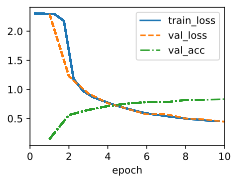

In [14]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

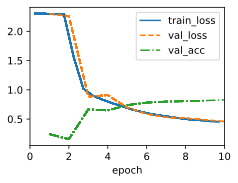

In [15]:
model = ChiAlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## Discussion

AlexNet's structure bears a striking resemblance to LeNet, with a number of critical improvements, both for accuracy (dropout) and for ease of training (ReLU). What is equally striking is the amount of progress that has been made in terms of deep learning tooling. What was several months of work in 2012 can now be accomplished in a dozen lines of code using any modern framework.

Reviewing the architecture, we see that AlexNet has an Achilles heel when it comes to efficiency: the last two hidden layers require matrices of size $6400 \times 4096$ and $4096 \times 4096$, respectively. This corresponds to 164 MB of memory and 81 MFLOPs of computation, both of which are a nontrivial outlay, especially on smaller devices, such as mobile phones. This is one of the reasons why AlexNet has been surpassed by much more effective architectures that we will cover in the following sections. Nonetheless, it is a key step from shallow to deep networks that are used nowadays. Note that even though the number of parameters exceeds by far the amount of training data in our experiments (the last two layers have more than 40 million parameters, trained on a datasets of 60 thousand images), there is hardly any overfitting: training and validation loss are virtually identical throughout training. This is due to the improved regularization, such as dropout, inherent in modern deep network designs.

Although it seems that there are only a few more lines in AlexNet's implementation than in LeNet's, it took the academic community many years to embrace this conceptual change and take advantage of its excellent experimental results. This was also due to the lack of efficient computational tools. At the time neither DistBelief :cite:`Dean.Corrado.Monga.ea.2012` nor Caffe :cite:`Jia.Shelhamer.Donahue.ea.2014` existed, and Theano :cite:`Bergstra.Breuleux.Bastien.ea.2010` still lacked many distinguishing features. It was the availability of TensorFlow :cite:`Abadi.Barham.Chen.ea.2016` that dramatically changed the situation.

## Exercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.
    1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
    1. Calculate the computational cost for the convolutions and the fully connected layers.
    1. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
1. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
1. Why do engineers no longer report performance benchmarks on AlexNet?
1. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
    1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    1. Design a better model that works directly on $28 \times 28$ images.
1. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
1. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
1. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

## 讨论

AlexNet的结构与LeNet惊人地相似，但做了一些关键改进，既提高了准确性（dropout），又使训练更容易（ReLU）。同样令人惊讶的是深度学习工具方面的进步。2012年需要数月完成的工作，现在使用任何现代框架只需十几行代码就能实现。

回顾架构，我们发现AlexNet在效率方面存在致命弱点：最后两个隐藏层需要大小分别为$6400 \times 4096$和$4096 \times 4096$的矩阵。这对应164MB内存和81MFLOPs计算量，对于移动设备等小型设备来说都是不小的开销。这也是AlexNet被后续更高效的架构超越的原因之一。尽管如此，它仍是从浅层网络到现代深层网络的关键一步。值得注意的是，尽管参数数量远超我们的实验训练数据量（最后两层有超过4000万参数，而训练数据集只有6万张图像），但几乎没有出现过拟合：训练和验证损失在整个训练过程中几乎相同。这要归功于现代深度网络设计中改进的正则化方法，如dropout。

尽管AlexNet的实现看起来只比LeNet多几行代码，学术界却花了多年时间才接受这一概念性变革并利用其出色的实验结果。这也与当时缺乏高效计算工具有关。那时既没有DistBelief :cite:`Dean.Corrado.Monga.ea.2012`也没有Caffe :cite:`Jia.Shelhamer.Donahue.ea.2014`，Theano :cite:`Bergstra.Breuleux.Bastien.ea.2010`也缺少许多显著特性。TensorFlow :cite:`Abadi.Barham.Chen.ea.2016`的出现才彻底改变了这一局面。

## 练习

1. 根据上述讨论，分析AlexNet的计算特性：
    1. 分别计算卷积层和全连接层的内存占用，哪个占主导？
    1. 计算卷积层和全连接层的计算成本
    1. 内存（读写带宽、延迟、大小）如何影响计算？对训练和推理的影响有区别吗？

2. 假设你是芯片设计师，需要在计算和内存带宽之间权衡：
    - 更快的芯片需要更多功耗和可能更大的芯片面积
    - 更多内存带宽需要更多引脚和控制逻辑，也会增加面积
    你会如何优化？

3. 为什么工程师不再报告AlexNet的性能基准？

4. 尝试增加AlexNet的训练周期数。与LeNet相比结果有何不同？为什么？

5. AlexNet对Fashion-MNIST数据集可能过于复杂，特别是初始图像分辨率较低：
    1. 尝试简化模型以加快训练速度，同时确保准确率不会显著下降
    1. 设计一个直接在$28 \times 28$图像上工作的更好模型

6. 修改批量大小，观察吞吐量（图像/秒）、准确率和GPU内存的变化

7. 将dropout和ReLU应用于LeNet-5。有改进吗？能否通过预处理利用图像固有的不变性来进一步改进？

8. 你能让AlexNet过拟合吗？需要移除或改变哪些特性才能破坏训练？


[Discussions](https://discuss.d2l.ai/t/76)
